In [2]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression

In [3]:
# Cargar el dataset
housing = fetch_california_housing(as_frame=True)

# Lo convertimos a dataframe y mostramos
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


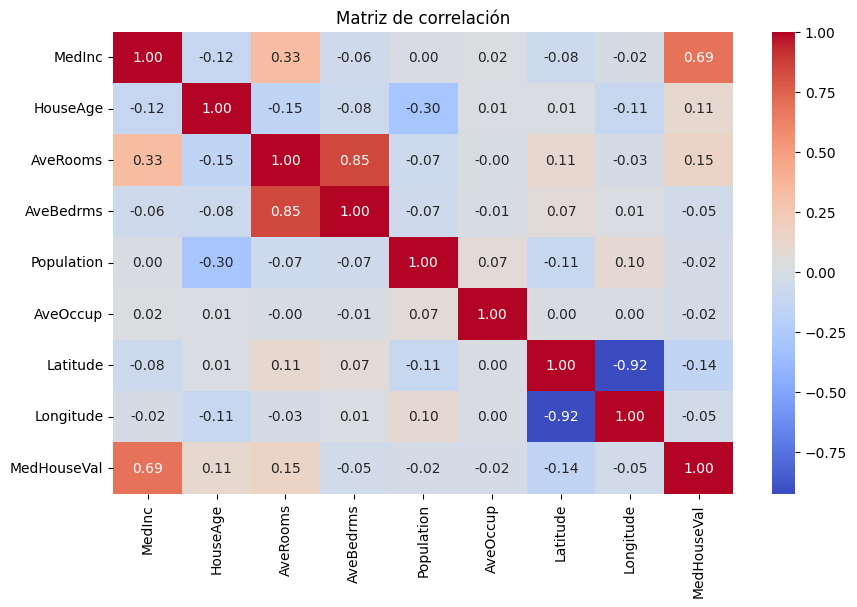

In [4]:
#Correlación
corr_housing = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_housing, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

,mutual_information
Longitude,0.400147
MedInc,0.387097
Latitude,0.370763
AveRooms,0.102874
AveOccup,0.072716
HouseAge,0.033368
AveBedrms,0.024149
Population,0.020878


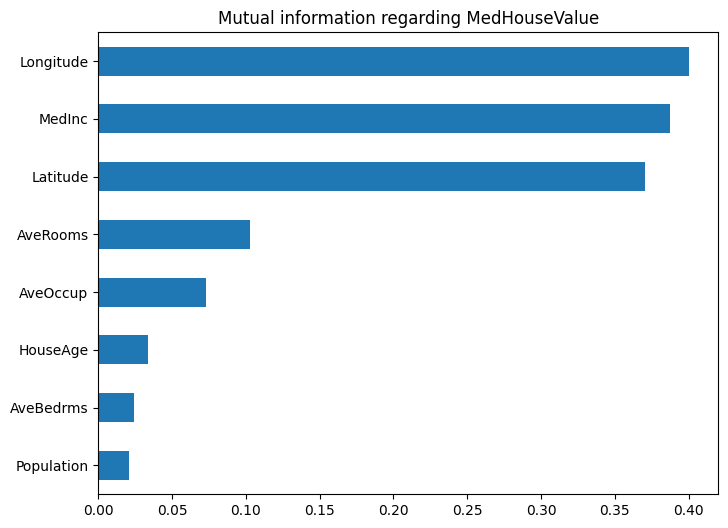

In [7]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
mutualinfo = mutual_info_regression(X, y, random_state=42)

mutualinfo_scores = pd.Series(mutualinfo, index=X.columns).sort_values(ascending=False)
display(mutualinfo_scores.to_frame("mutual_information"))
plt.figure(figsize=(8,6))
mutualinfo_scores.sort_values().plot.barh()
plt.title("Mutual information regarding MedHouseValue")
plt.show()